In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import os
import shutil
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split

N                                 35
Asthma                            17
heart failure                     15
asthma                            15
COPD                               8
pneumonia                          5
Lung Fibrosis                      4
Heart Failure                      3
BRON                               3
Heart Failure + COPD               2
Plueral Effusion                   2
Heart Failure + Lung Fibrosis      1
Asthma and lung fibrosis           1
copd                               1
Name: Disease, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Asthma'),
  Text(1, 0, 'Heart Failure + Lung Fibrosis '),
  Text(2, 0, 'Heart Failure + COPD'),
  Text(3, 0, 'Plueral Effusion'),
  Text(4, 0, 'Heart Failure'),
  Text(5, 0, 'heart failure'),
  Text(6, 0, 'COPD'),
  Text(7, 0, 'pneumonia'),
  Text(8, 0, 'Asthma and lung fibrosis'),
  Text(9, 0, 'BRON'),
  Text(10, 0, 'Lung Fibrosis'),
  Text(11, 0, 'copd'),
  Text(12, 0, 'asthma'),
  Text(13, 0, 'N')])

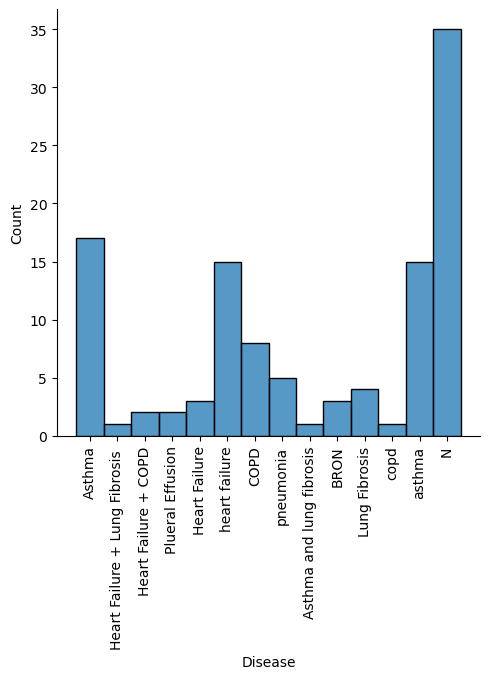

In [57]:
diagnosis_data = pd.read_excel('C:\\Users\\user\\Desktop\\KAUH Dataset\\Data annotation.xlsx',usecols='B, E',names=['Sex','Disease'])
diagnosis_data.head(4)
print (diagnosis_data.Disease.value_counts())
sns.displot(diagnosis_data.Disease)
#sns.countplot(diagnosis_data.Diagnosis.value_counts())
plt.xticks(rotation=90)

In [58]:
mypath = 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files'
filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.wav'))] 
filepaths = [join(mypath, f) for f in filenames] 
print(filepaths)

['C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP100_N,N,P R M,70,F.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP101_Asthma,E W,P L M,12,F.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP102_N,N,P L L,41,M.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP103_N,N,P R U,81,F.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP104_Asthma,E W,P L U,45,F.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP105_Lung Fibrosis,Crep,A U R,44,M.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP106_Asthma,E W,P L U,45,F.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP107_Asthma,E W,P L U,59,F.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP108_COPD,E W,P R L ,63,M.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP109_N,N,P L M,26,M.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP10_Asthma,E W,P R U,59,M.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\

In [59]:
def Name_Access(Filename):
    """
    Extracts disease name from the filename.
    Args:
        Filename (str): The filename string to process.
    Returns:
        list: A list containing a tuple with (disease_name, has_plus_flag) or an empty list if filename format is invalid.
    """
    parts = Filename.split("\\")  # Split on backslash for Windows paths
    if len(parts) > 4:
        file_name = parts[-1]  # Get the last part (actual filename)
        disease_name = file_name.split("_")[1].split(",")[0]  # Extract disease name
        has_plus = "+" in disease_name
        return [(disease_name, str(has_plus))]
    return []

# Assuming filepaths is a list of valid filenames
Asthma = COPD = HeartFailure = BRON = Pneumonia = LungFibrosis = Trash = Normal = PleuralEffusion = 0

for soundDir in filepaths:
    Diseases = Name_Access(soundDir)
    if Diseases:
        disease = Diseases[0][0].lower()
        if disease == "asthma":
            Asthma += 1
        elif disease in ["heart failure", "heart_failure"]:
            HeartFailure += 1
        elif disease == "copd":
            COPD += 1
        elif disease == "bron":
            BRON += 1
        elif disease == "pneumonia":
            Pneumonia += 1
        elif disease == "lung fibrosis":
            LungFibrosis += 1
        elif disease == "pleural effusion":
            PleuralEffusion += 1
        elif disease == "n":
            Normal += 1
        else:
            Trash += 1
    else:
        print(f"Error processing file: {soundDir}")

print("Asthma", Asthma)
print("HeartFailure", HeartFailure)
print("COPD", COPD)
print("BRON", BRON)
print("LungFibrosis", LungFibrosis)
print("PleuralEffusion", PleuralEffusion)
print("Pneumonia", Pneumonia)
print("Normal", Normal)
print("Trash", Trash)

Asthma 96
HeartFailure 54
COPD 27
BRON 9
LungFibrosis 12
PleuralEffusion 0
Pneumonia 15
Normal 105
Trash 18


In [60]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data,strate):
    data = librosa.effects.time_stretch(data,rate=strate)
    return data

def pitch_shift (data ,sampling_r, rate):
    data = librosa.effects.pitch_shift(data, sr=sampling_r, n_steps=rate)
    return data

In [61]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
def fourier_bessel_features(data, sampling_rate, n_coeff):
    t = np.arange(len(data)) / sampling_rate
    fb_coeff = np.zeros(n_coeff)
    
    for i in range(n_coeff):
        j = i + 1
        fb_coeff[i] = np.sum(data * np.cos(2 * np.pi * j * t)) / len(data)
    
    return fb_coeff


def plot_features(mfccs, fb_coeffs, combined_features):
    # Plot MFCC features
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title('MFCC Features')
    plt.colorbar(format='%+2.0f dB')

    # Plot Fourier-Bessel coefficients
    plt.subplot(1, 3, 2)
    plt.stem(fb_coeffs, use_line_collection=True)
    plt.title('Fourier-Bessel Coefficients')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Value')

    # Plot Combined Features
    plt.subplot(1, 3, 3)
    plt.stem(combined_features, use_line_collection=True)
    plt.title('Combined MFCC and Fourier-Bessel Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

def feature_extraction(dir_):
    X_Features = []
    y_Labels = []
    mfcc_features = 40
    fb_coeffs = 20  # Number of Fourier-Bessel coefficients

    for soundDir in dir_:
        Diseases = Name_Access(soundDir)
        if Diseases:
            disease = Diseases[0][0].lower()
            
            if disease in ["asthma", "copd", "pneumonia", "n"]:
                data, sampling_rate = librosa.load(soundDir)
                
                # Compute MFCC features
                mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=mfcc_features)
                mfccs_features = np.mean(mfccs.T, axis=0)
                
                # Compute Fourier-Bessel features
                fb_features = fourier_bessel_features(data, sampling_rate, fb_coeffs)
                
                # Combine MFCC and Fourier-Bessel features
                combined_features = np.concatenate((mfccs_features, fb_features))
                
                if disease == "asthma":
                    X_Features.append(combined_features)
                    y_Labels.append('Asthma')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('Asthma')
                
                elif disease == "copd":
                    X_Features.append(combined_features)
                    y_Labels.append('COPD')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('COPD')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('COPD')
                
                elif disease == "pneumonia":
                    X_Features.append(combined_features)
                    y_Labels.append('Pneumonia')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('Pneumonia')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('Pneumonia')
                
                elif disease == "n":
                    X_Features.append(combined_features)
                    y_Labels.append('Healthy')
                   
                    data_stretch = stretch(data, 0.8)
                    mfccs_stretch = librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_stretch = np.mean(mfccs_stretch.T, axis=0)
                    fb_features_stretch = fourier_bessel_features(data_stretch, sampling_rate, fb_coeffs)
                    combined_features_stretch = np.concatenate((mfccs_features_stretch, fb_features_stretch))
                    X_Features.append(combined_features_stretch)
                    y_Labels.append('Healthy')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('Healthy')

    X_data = np.array(X_Features)
    y_data = np.array(y_Labels)
    
    return X_data, y_data 

# Usage
X_data, y_data = feature_extraction(filepaths)

In [62]:
x_mfccs, y_mfccs = feature_extraction(filepaths)

C:\Users\user\AppData\Local\Temp\ipykernel_13204\4159421212.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(combined_features[idx], use_line_collection=True, markerfmt='.', label=f'{label} sample {idx}')


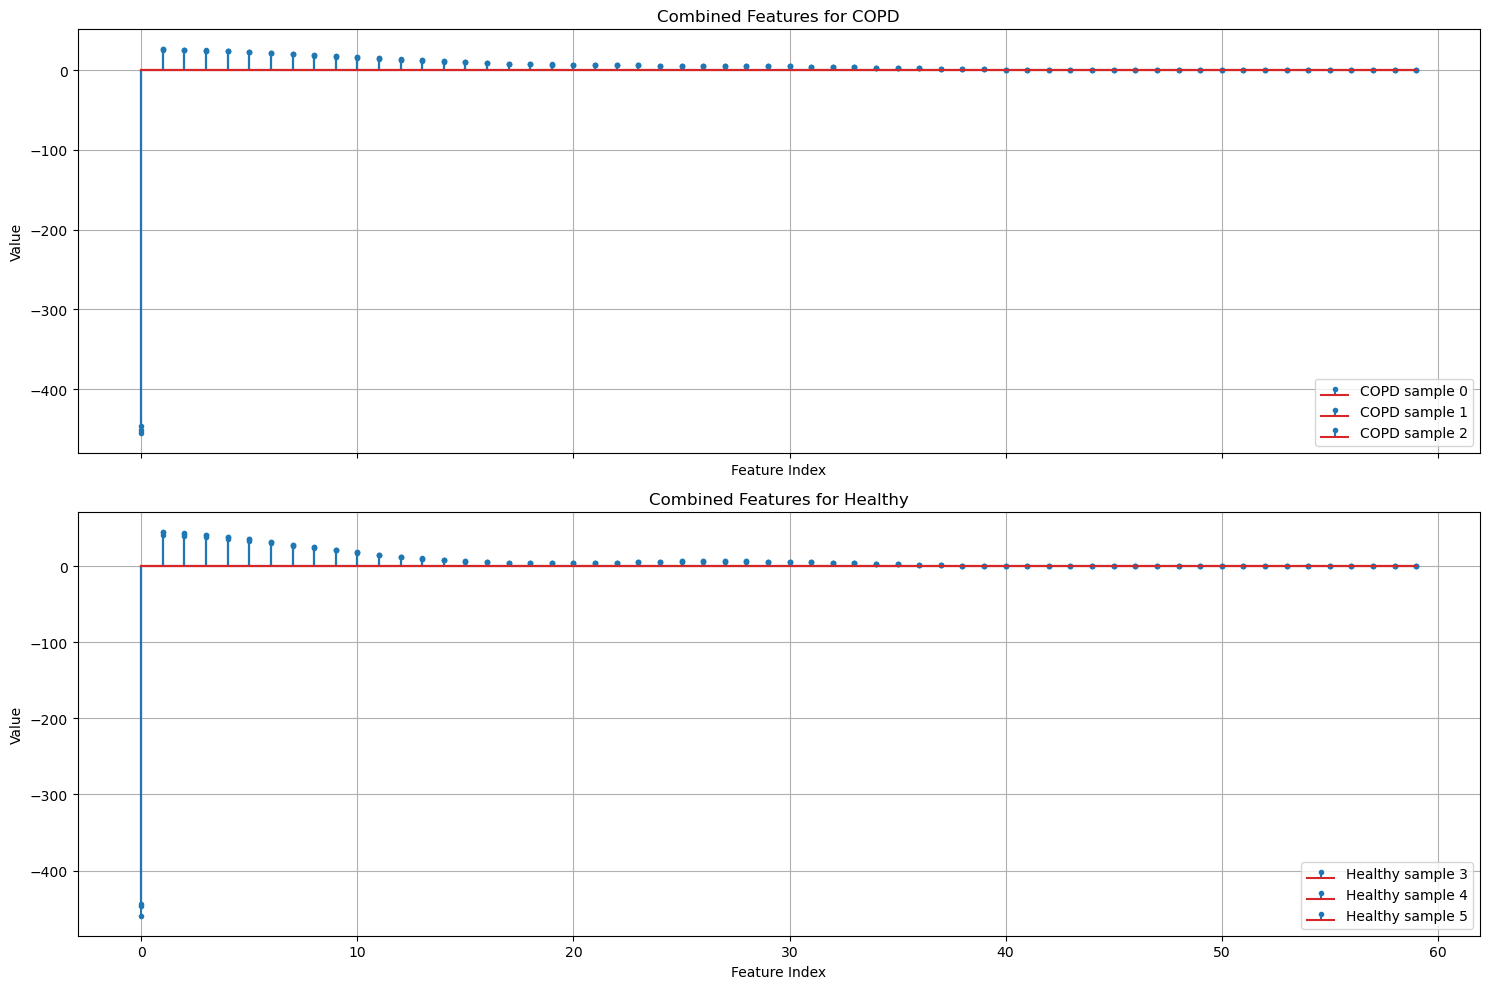

In [64]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def fourier_bessel_features(data, sampling_rate, n_coeff):
    t = np.arange(len(data)) / sampling_rate
    fb_coeff = np.zeros(n_coeff)
    
    for i in range(n_coeff):
        j = i + 1
        fb_coeff[i] = np.sum(data * np.cos(2 * np.pi * j * t)) / len(data)
    
    return fb_coeff

def plot_combined_features(combined_features, labels):
    unique_labels = np.unique(labels)
    num_classes = len(unique_labels)
    
    if num_classes == 0:
        print("No unique labels found.")
        return
    
    # Create subplots for each class
    fig, axes = plt.subplots(num_classes, 1, figsize=(15, num_classes * 5), sharex=True)
    
    if num_classes == 1:
        axes = [axes]
    
    for i, label in enumerate(unique_labels):
        class_indices = np.where(labels == label)[0]
        ax = axes[i]
        for idx in class_indices:
            ax.stem(combined_features[idx], use_line_collection=True, markerfmt='.', label=f'{label} sample {idx}')
        ax.set_title(f'Combined Features for {label}')
        ax.set_xlabel('Feature Index')
        ax.set_ylabel('Value')
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

def feature_extraction(dir_):
    X_Features = []
    y_Labels = []
    mfcc_features = 40
    fb_coeffs = 20  # Number of Fourier-Bessel coefficients

    for soundDir in dir_:
        Diseases = Name_Access(soundDir)
        if Diseases:
            disease = Diseases[0][0].lower()
            
            if disease in ["asthma", "copd", "pneumonia", "n"]:
                data, sampling_rate = librosa.load(soundDir)
                
                # Compute MFCC features
                mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=mfcc_features)
                mfccs_features = np.mean(mfccs.T, axis=0)
                
                # Compute Fourier-Bessel features
                fb_features = fourier_bessel_features(data, sampling_rate, fb_coeffs)
                
                # Combine MFCC and Fourier-Bessel features
                combined_features = np.concatenate((mfccs_features, fb_features))
                
                if disease == "asthma":
                    X_Features.append(combined_features)
                    y_Labels.append('Asthma')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('Asthma')
                
                elif disease == "copd":
                    X_Features.append(combined_features)
                    y_Labels.append('COPD')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('COPD')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('COPD')
                
                elif disease == "pneumonia":
                    X_Features.append(combined_features)
                    y_Labels.append('Pneumonia')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('Pneumonia')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('Pneumonia')
                
                elif disease == "n":
                    X_Features.append(combined_features)
                    y_Labels.append('Healthy')
                   
                    data_stretch = stretch(data, 0.8)
                    mfccs_stretch = librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_stretch = np.mean(mfccs_stretch.T, axis=0)
                    fb_features_stretch = fourier_bessel_features(data_stretch, sampling_rate, fb_coeffs)
                    combined_features_stretch = np.concatenate((mfccs_features_stretch, fb_features_stretch))
                    X_Features.append(combined_features_stretch)
                    y_Labels.append('Healthy')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('Healthy')

    X_data = np.array(X_Features)
    y_data = np.array(y_Labels)
    
    return X_data, y_data 

# Usage
filepaths = ['C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP17_COPD,E W,A R M,57,M.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP48_N,N,P L U,31,M.wav']  # Example filepaths
X_data, y_data = feature_extraction(filepaths)

# Visualize combined features
plot_combined_features(X_data, y_data)


C:\Users\user\AppData\Local\Temp\ipykernel_13204\2912253480.py:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(fb_coeffs, use_line_collection=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13204\2912253480.py:35: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mfcc_combined, use_line_collection=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13204\2912253480.py:42: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line

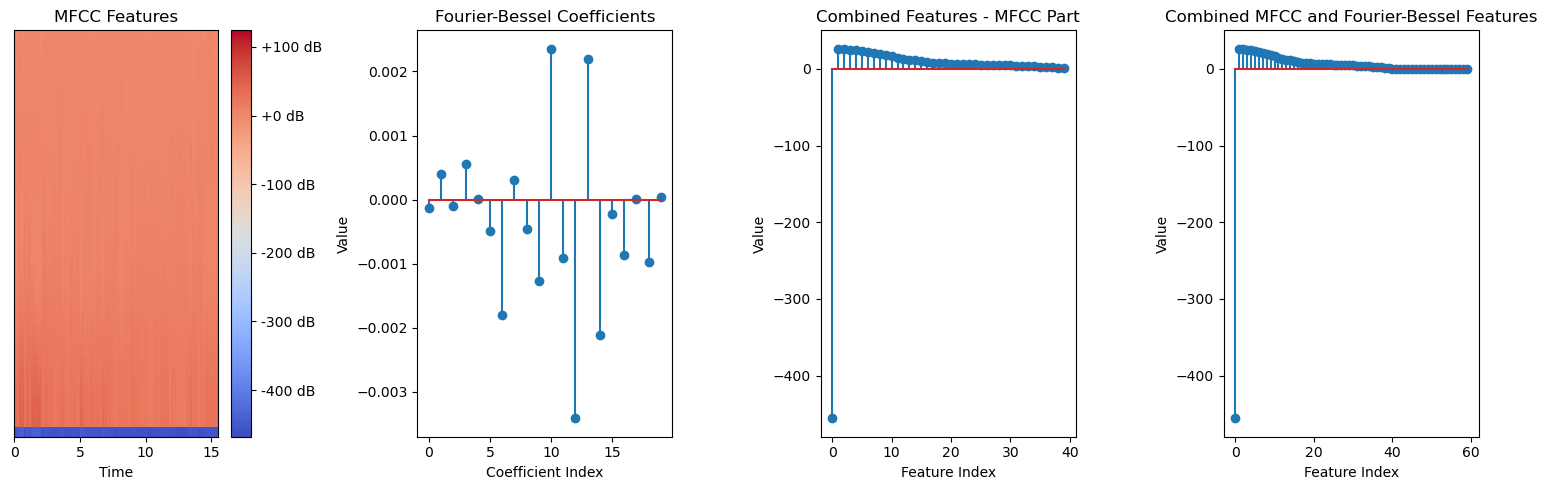

In [65]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def fourier_bessel_features(data, sampling_rate, n_coeff):
    t = np.arange(len(data)) / sampling_rate
    fb_coeff = np.zeros(n_coeff)
    
    for i in range(n_coeff):
        j = i + 1
        fb_coeff[i] = np.sum(data * np.cos(2 * np.pi * j * t)) / len(data)
    
    return fb_coeff

def plot_features(mfccs, fb_coeffs, combined_features, n_mfcc):
    # Plot MFCC features
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title('MFCC Features')
    plt.colorbar(format='%+2.0f dB')

    # Plot Fourier-Bessel coefficients
    plt.subplot(1, 4, 2)
    plt.stem(fb_coeffs, use_line_collection=True)
    plt.title('Fourier-Bessel Coefficients')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Value')

    # Extract and Plot Combined Features (MFCC part)
    mfcc_combined = combined_features[:n_mfcc]
    plt.subplot(1, 4, 3)
    plt.stem(mfcc_combined, use_line_collection=True)
    plt.title('Combined Features - MFCC Part')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')

    # Plot Combined Features
    plt.subplot(1, 4, 4)
    plt.stem(combined_features, use_line_collection=True)
    plt.title('Combined MFCC and Fourier-Bessel Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

def feature_extraction(dir_):
    X_Features = []
    y_Labels = []
    mfcc_features = 40
    fb_coeffs = 20  # Number of Fourier-Bessel coefficients

    for soundDir in dir_:
        Diseases = Name_Access(soundDir)
        if Diseases:
            disease = Diseases[0][0].lower()
            
            if disease in ["asthma", "copd", "pneumonia", "n"]:
                data, sampling_rate = librosa.load(soundDir)
                
                # Compute MFCC features
                mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=mfcc_features)
                mfccs_features = np.mean(mfccs.T, axis=0)
                
                # Compute Fourier-Bessel features
                fb_features = fourier_bessel_features(data, sampling_rate, fb_coeffs)
                
                # Combine MFCC and Fourier-Bessel features
                combined_features = np.concatenate((mfccs_features, fb_features))
                
                if disease == "asthma":
                    X_Features.append(combined_features)
                    y_Labels.append('Asthma')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('Asthma')
                
                elif disease == "copd":
                    X_Features.append(combined_features)
                    y_Labels.append('COPD')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('COPD')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('COPD')
                
                elif disease == "pneumonia":
                    X_Features.append(combined_features)
                    y_Labels.append('Pneumonia')
                    
                    data_noise = add_noise(data, 0.001)
                    mfccs_noise = librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_noise = np.mean(mfccs_noise.T, axis=0)
                    fb_features_noise = fourier_bessel_features(data_noise, sampling_rate, fb_coeffs)
                    combined_features_noise = np.concatenate((mfccs_features_noise, fb_features_noise))
                    X_Features.append(combined_features_noise)
                    y_Labels.append('Pneumonia')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('Pneumonia')
                
                elif disease == "n":
                    X_Features.append(combined_features)
                    y_Labels.append('Healthy')
                   
                    data_stretch = stretch(data, 0.8)
                    mfccs_stretch = librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_stretch = np.mean(mfccs_stretch.T, axis=0)
                    fb_features_stretch = fourier_bessel_features(data_stretch, sampling_rate, fb_coeffs)
                    combined_features_stretch = np.concatenate((mfccs_features_stretch, fb_features_stretch))
                    X_Features.append(combined_features_stretch)
                    y_Labels.append('Healthy')
                    
                    data_shift = shift(data, 1600)
                    mfccs_shift = librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=mfcc_features)
                    mfccs_features_shift = np.mean(mfccs_shift.T, axis=0)
                    fb_features_shift = fourier_bessel_features(data_shift, sampling_rate, fb_coeffs)
                    combined_features_shift = np.concatenate((mfccs_features_shift, fb_features_shift))
                    X_Features.append(combined_features_shift)
                    y_Labels.append('Healthy')

    X_data = np.array(X_Features)
    y_data = np.array(y_Labels)
    
    return X_data, y_data 

# Example usage
filepaths = ['C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP17_COPD,E W,A R M,57,M.wav', 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP48_N,N,P L U,31,M.wav']  # Example filepaths
X_data, y_data = feature_extraction(filepaths)
X_data, y_data = feature_extraction(filepaths)

# Visualize features for the first sample
mfccs = librosa.feature.mfcc(y=librosa.load(filepaths[0])[0], sr=librosa.load(filepaths[0])[1], n_mfcc=40)
fb_coeffs = fourier_bessel_features(librosa.load(filepaths[0])[0], librosa.load(filepaths[0])[1], 20)
plot_features(mfccs, fb_coeffs, X_data[0], 40)


In [44]:
import librosa.display

def plot_mfcc(filepath):
    """
    Plots the MFCC features of the audio file.
    
    Args:
        filepath (str): The path to the audio file.
    """
    audio, sr = librosa.load(filepath)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

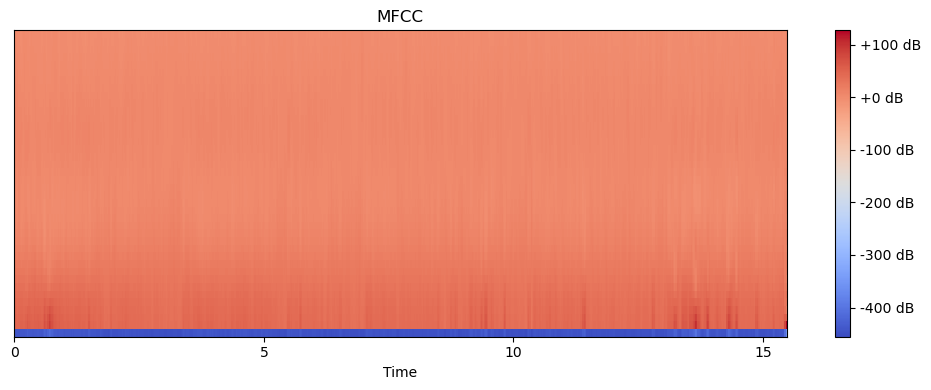

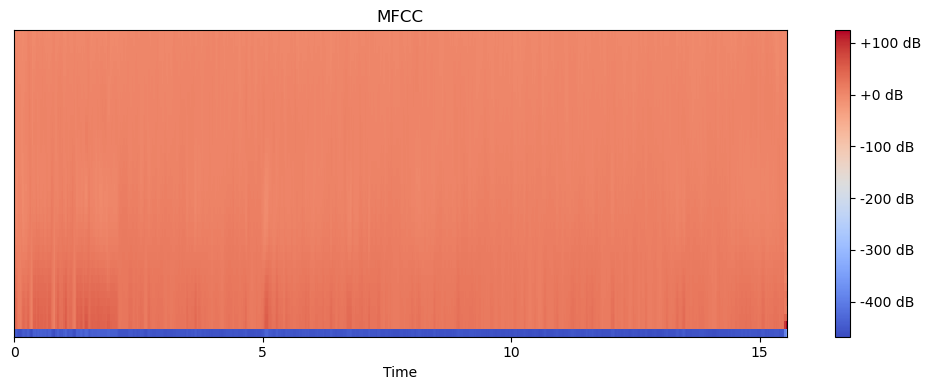

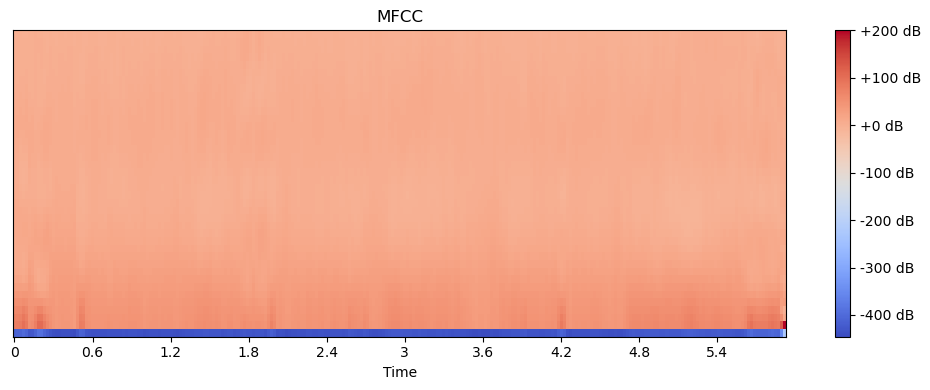

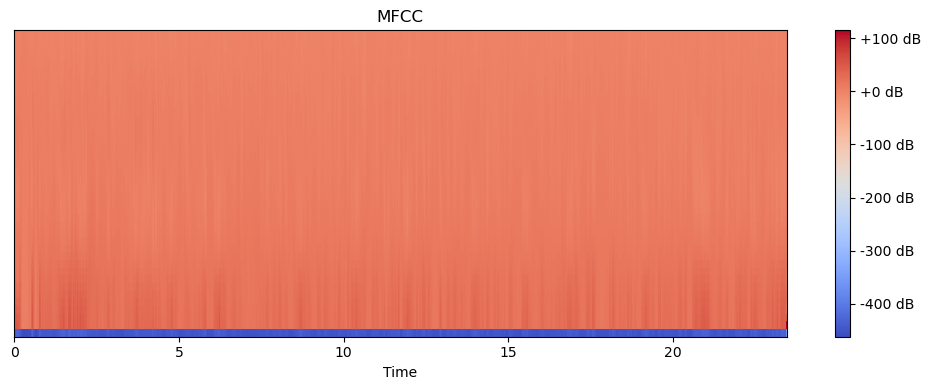

In [45]:
plot_mfcc('C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP48_N,N,P L U,31,M.wav')
plot_mfcc('C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP17_COPD,E W,A R M,57,M.wav')
plot_mfcc('C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP10_Asthma,E W,P R U,59,M.wav')
plot_mfcc('C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP18_pneumonia,C,P R U,57,M.wav')

In [46]:
def augmented_data_count(lables):
    unique, counts = np.unique(lables, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))
    
    plt.bar(courses, values, color =['orange','green','blue','red','yellow','black'],
            width = 0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print (data_count)


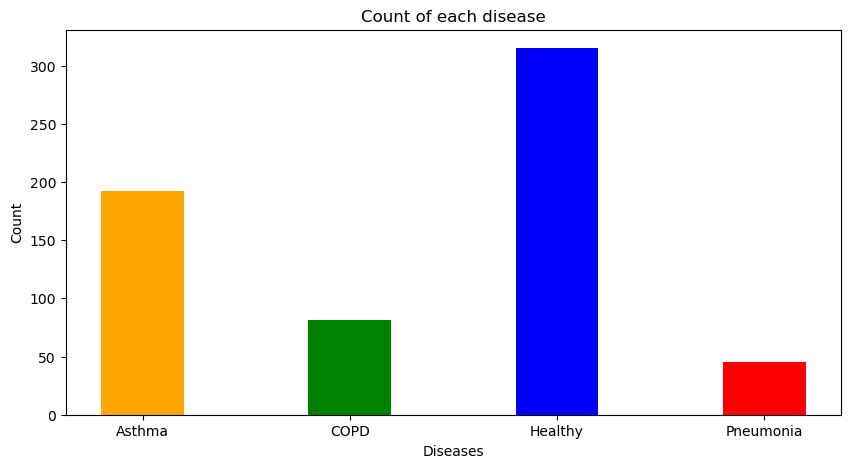

{'Asthma': 192, 'COPD': 81, 'Healthy': 315, 'Pneumonia': 45}


In [47]:
 augmented_data_count(y_mfccs)

In [48]:
y_data_encode = y_mfccs.reshape(y_mfccs.shape[0], 1)

y_data_encode = np.where(y_data_encode == 'COPD', np.array([1,0,0,0,0]).reshape(1,5), y_data_encode)
y_data_encode = np.where(y_data_encode == 'Asthma', np.array([0,1,0,0,0]).reshape(1,5), y_data_encode)
y_data_encode = np.where(y_data_encode == 'Pneumonia', np.array([0,0,1,0,0]).reshape(1,5), y_data_encode)
y_data_encode = np.where(y_data_encode == 'Healthy', np.array([0,0,0,1,0]).reshape(1,5), y_data_encode)
y_data_encode = np.where(y_data_encode == 'Normal', np.array([0,0,0,1,0]).reshape(1,5), y_data_encode)

Y_data = y_data_encode.astype('float64')

In [49]:
x_mfccs.shape,Y_data.shape

((633, 60), (633, 5))

In [50]:
# Splitting data into training ,validation and testing sets
mfcc_train, mfcc_val, lables_train, lables_val  = train_test_split(x_mfccs,Y_data , test_size=0.175, random_state=10)
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(mfcc_train, lables_train, test_size=0.075, random_state=10)

print (mfcc_train.shape, mfcc_val.shape, mfcc_test.shape)
print (lables_train.shape, lables_val.shape, lables_test.shape)

(482, 60) (111, 60) (40, 60)
(482, 5) (111, 5) (40, 5)


In [51]:
x_train_gru = np.expand_dims(mfcc_train,axis=1)
x_val_gru = np.expand_dims(mfcc_val,axis=1)
x_test_gru = np.expand_dims(mfcc_test,axis=1)

y_train_gru = np.expand_dims(lables_train,axis=1)
y_val_gru = np.expand_dims(lables_val,axis=1)
y_test_gru = np.expand_dims(lables_test,axis=1)

In [52]:
from tensorflow.keras.models import Sequential, Model
from keras.layers import GRU, Input, LeakyReLU, add, Dense, Dropout
from keras.models import Model

def InstantiateModel(in_):
    '''
    Architecture of the Deep Learning Model.
    Args:
        in_: input tensor shape
    Returns: Tensor model
    '''
    model_2_1 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(in_)
    model_2 = LeakyReLU()(model_2_1)
    model_2 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_2)
    model_2 = LeakyReLU()(model_2)

    model_3 = GRU(64, return_sequences=True, activation=None, go_backwards=True)(in_)
    model_3 = LeakyReLU()(model_3)
    model_3 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_3)
    model_3 = LeakyReLU()(model_3)

    model_add_1 = add([model_3, model_2])

    model_5 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_add_1)
    model_5 = LeakyReLU()(model_5)
    model_5 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(model_5)
    model_5 = LeakyReLU()(model_5)

    model_6 = GRU(64, return_sequences=True, activation=None, go_backwards=True)(model_add_1)
    model_6 = LeakyReLU()(model_6)
    model_6 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(model_6)
    model_6 = LeakyReLU()(model_6)

    model_add_2 = add([model_5, model_6, model_2_1])

    model_7 = Dense(64, activation=None)(model_add_2)
    model_7 = LeakyReLU()(model_7)
    model_7 = Dropout(0.2)(model_7)
    model_7 = Dense(16, activation=None)(model_7)
    model_7 = LeakyReLU()(model_7)

    model_9 = Dense(32, activation=None)(model_add_2)
    model_9 = LeakyReLU()(model_9)
    model_9 = Dropout(0.2)(model_9)
    model_9 = Dense(16, activation=None)(model_9)
    model_9 = LeakyReLU()(model_9)

    model_add_3 = add([model_7, model_9])

    model_10 = Dense(16, activation=None)(model_add_3)
    model_10 = LeakyReLU()(model_10)
    model_10 = Dropout(0.5)(model_10)
    model_10 = Dense(5, activation="softmax")(model_10)

    return model_10

# Assuming you have an input tensor, you can create the model as follows:
input_tensor = Input(shape=(1,60))  # Replace ... with the actual shape of your input
model = Model(inputs=input_tensor, outputs=InstantiateModel(input_tensor))

# Print model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 1, 60)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_10 (GRU)                  │ (None, 1, 64)             │          24,192 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_8 (GRU)                   │ (None, 1, 32)             │           9,024 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ leaky_re_lu_15 (LeakyReLU)    │ (None, 1, 64)             │               0 │ gru_10[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ leaky_re_lu_13 (LeakyReLU)    │ (None, 1, 32)             │               0 │ gru_8[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_11 (GRU)                  │ (None, 1, 128)            │          74,496 │ leaky_re_lu_15[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_9 (GRU)                   │ (None, 1, 128)            │          62,208 │ leaky_re_lu_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ leaky_re_lu_16 (LeakyReLU)    │ (None, 1, 128)            │               0 │ gru_11[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ leaky_re_lu_14 (LeakyReLU)    │ (None, 1, 128)            │               0 │ gru_9[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_3 (Add)                   │ (None, 1, 128)            │               0 │ leaky_re_lu_16[0][0],      │
│                               │                           │                 │ leaky_re_lu_14[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_12 (GRU)                  │ (None, 1, 128)            │          99,072 │ add_3[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_14 (GRU)                  │ (None, 1, 64)             │          37,248 │ add_3[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ leaky_re_lu_17 (LeakyReLU)    │ (None, 1, 128)            │               0 │ gru_12[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ leaky_re_lu_19 (LeakyReLU)    │ (None, 1, 64)             │               0 │ gru_14[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_13 (GRU)                  │ (None, 1, 32)             │          15,552 │ leaky_re_lu_17[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gru_15 (GRU)                  │ (None, 1, 32)             │           9,408 │ leaky_re_lu_19[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ leaky_re_lu_18 (LeakyReLU)    │ (None, 1, 32)             │               

 Total params: 336,293 (1.28 MB)

 Trainable params: 336,293 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

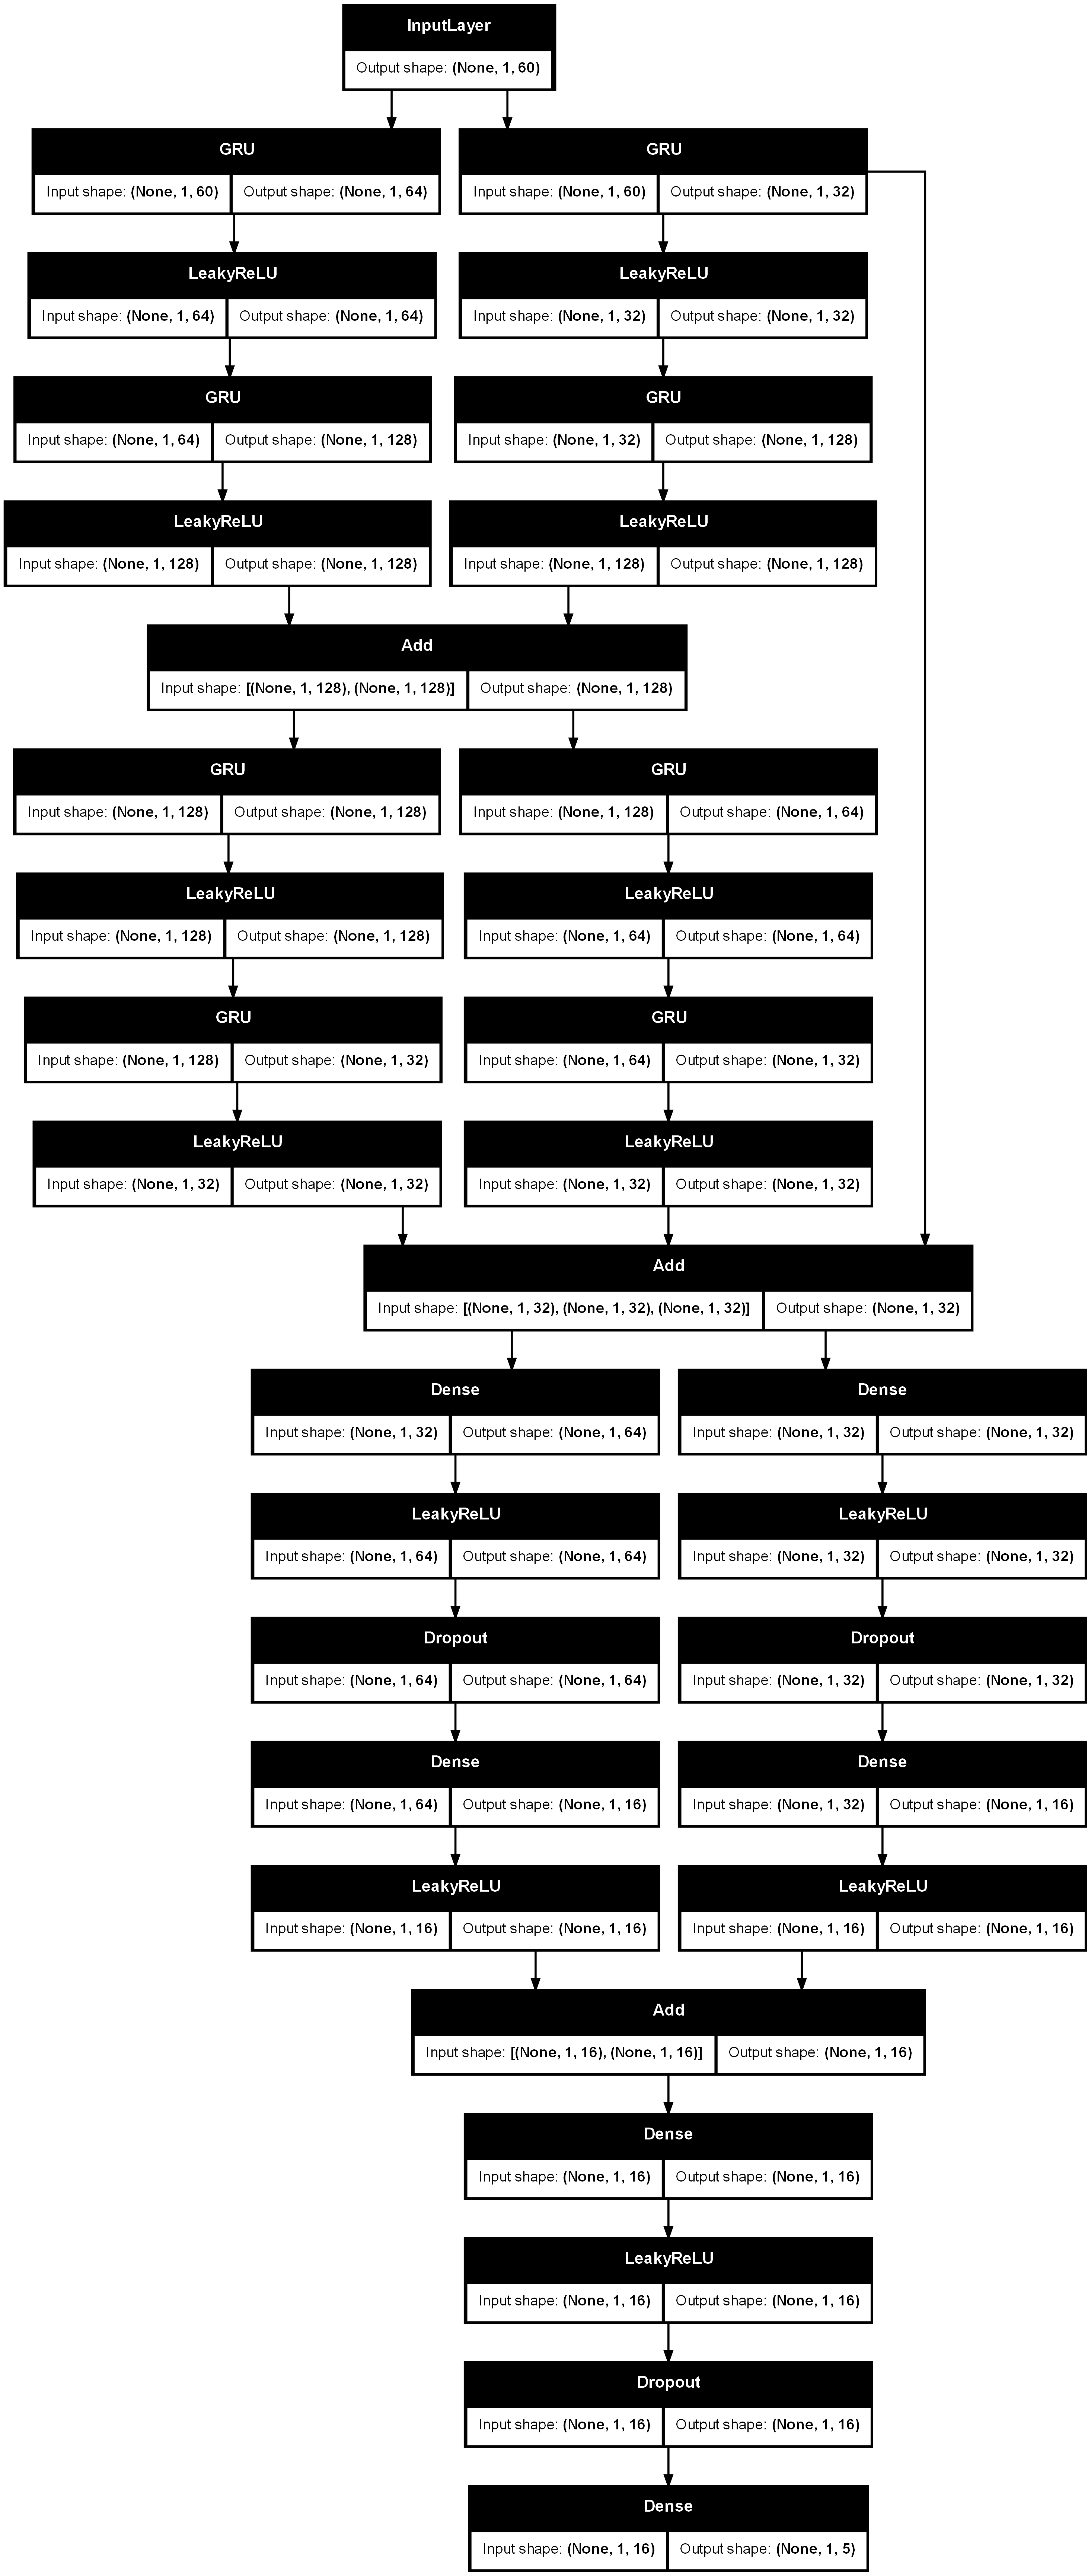

In [53]:
import  tensorflow as tf
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

In [54]:
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy',metrics=['accuracy'])

cb = tf.keras.callbacks.EarlyStopping(patience=300,monitor='accuracy',mode='max',restore_best_weights=True)

In [55]:
history = model.fit(x_train_gru, y_train_gru, batch_size=32, epochs=1000,validation_data=(x_val_gru, y_val_gru),  callbacks = cb)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.2835 - loss: 13.7022 - val_accuracy: 0.4955 - val_loss: 3.5196
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3622 - loss: 6.2594 - val_accuracy: 0.4865 - val_loss: 2.0697
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3199 - loss: 4.9473 - val_accuracy: 0.5045 - val_loss: 1.7743
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2757 - loss: 3.4256 - val_accuracy: 0.4865 - val_loss: 1.5420
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3558 - loss: 2.3115 - val_accuracy: 0.4955 - val_loss: 1.4447
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3360 - loss: 2.0575 - val_accuracy: 0.4955 - val_loss: 1.4351
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3698 - loss: 1.8020 - val_accuracy: 0.4865 - val_loss: 1.2587
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3848 - loss: 1.8100 - val_a

In [20]:
Model_Results = model.evaluate(x_test_gru, y_test_gru)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9688 - loss: 0.5161
LOSS:  0.5161
ACCURACY:  0.9688


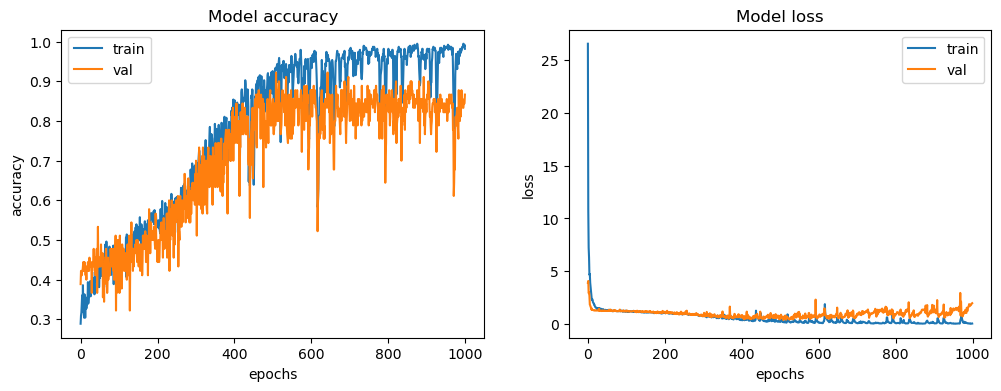

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

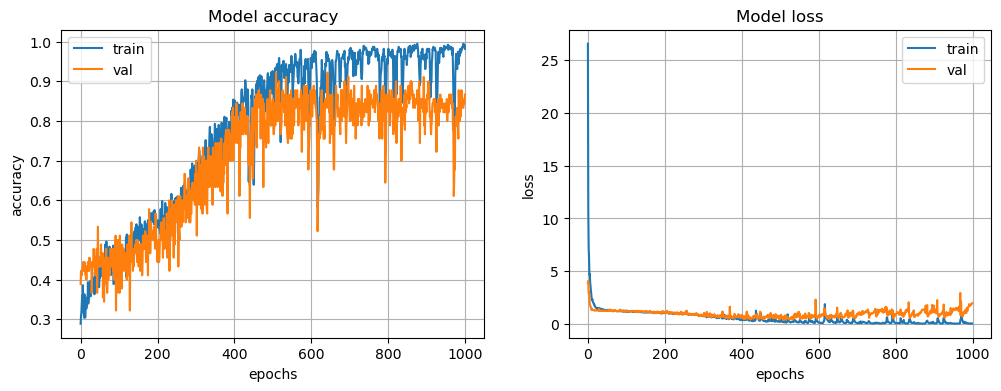

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    ax[i].grid(True)

plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step


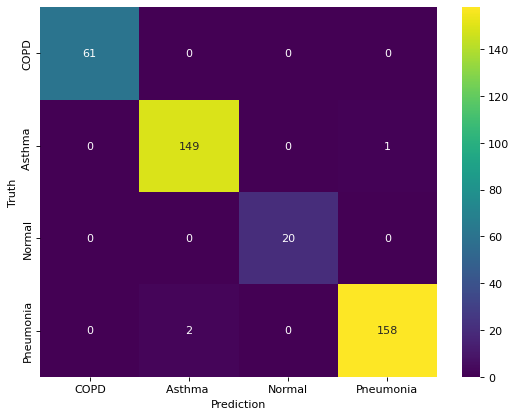

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
classes = ["COPD" ,"Asthma ", "Normal", "Pneumonia"]
preds = model.predict(x_train_gru)
classpreds = [np.argmax(t) for t in preds ]
y_trainclass = [np.argmax(t) for t in y_train_gru]
cm = confusion_matrix(y_trainclass, classpreds)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='viridis', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


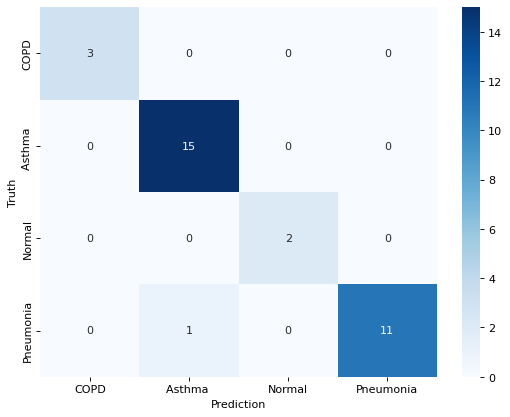

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
classes = ["COPD" ,"Asthma ", "Normal", "Pneumonia"]
preds = model.predict(x_test_gru)
classpreds = [np.argmax(t) for t in preds ]
y_testclass = [np.argmax(t) for t in y_test_gru]
cm = confusion_matrix(y_testclass, classpreds)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [25]:
print(classification_report(y_testclass, classpreds, target_names=classes))

              precision    recall  f1-score   support

        COPD       1.00      1.00      1.00         3
     Asthma        0.94      1.00      0.97        15
      Normal       1.00      1.00      1.00         2
   Pneumonia       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.98      0.98      0.98        32
weighted avg       0.97      0.97      0.97        32



In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming your data is in x_data and y_data
# Assuming the model is already built and compiled

# Number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
classes = ["COPD", "Asthma", "Normal", "Pneumonia"]
histories = []

# Define your callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # Add more callbacks if needed
]

for train_index, test_index in kf.split(x_data):
    x_train, x_val = x_data[train_index], x_data[test_index]
    y_train, y_val = y_data[train_index], y_data[test_index]

    # Reinitialize the model for each fold
    model = tf.keras.models.clone_model(model)
    model.set_weights(model.get_weights())  # Copy weights from the original model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val), callbacks=callbacks)
    histories.append(history)

    # Make predictions on the validation data
    preds = model.predict(x_val)
    classpreds = [np.argmax(t) for t in preds]
    y_val_class = [np.argmax(t) for t in y_val]

    # Compute the confusion matrix
    cm = confusion_matrix(y_val_class, classpreds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(cm, cmap='viridis', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

    # Print the classification report
    print(f'Classification Report for Fold {fold}')
    print(classification_report(y_val_class, classpreds, target_names=classes))

    fold += 1

# If needed, you can analyze the histories later
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'Val Fold {i+1}')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Fold {i+1}')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


NameError: name 'x_data' is not defined

In [27]:
def predict_class(audio_file_path, model, classes, features=40, soundDir=''):
    val = []
    data_x, sampling_rate = librosa.load(audio_file_path + soundDir)
    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T, axis=0)
    val.append(mfccs)
    val = np.expand_dims(val, axis=1)
    prediction = classes[np.argmax(model.predict(val))]
    print(prediction)
    print('*************')

In [28]:
dir1 = 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP1_Asthma,I E W,P L L,70,M.wav'
predict_class(dir1, model, classes)

dir2 = 'C:\\Users\\user\\Desktop\\KAUH Dataset\\Audio Files\\BP17_COPD,E W,A R M,57,M.wav'
predict_class(dir2, model, classes)

InvalidArgumentError: Graph execution error:

Detected at node functional_1_1/gru_1/while/body/_1/functional_1_1/gru_1/while/gru_cell_1/add defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [1,40], In[1]: [60,96]
	 [[{{node functional_1_1/gru_1/while/body/_1/functional_1_1/gru_1/while/gru_cell_1/add}}]] [Op:__inference_one_step_on_data_distributed_144523]

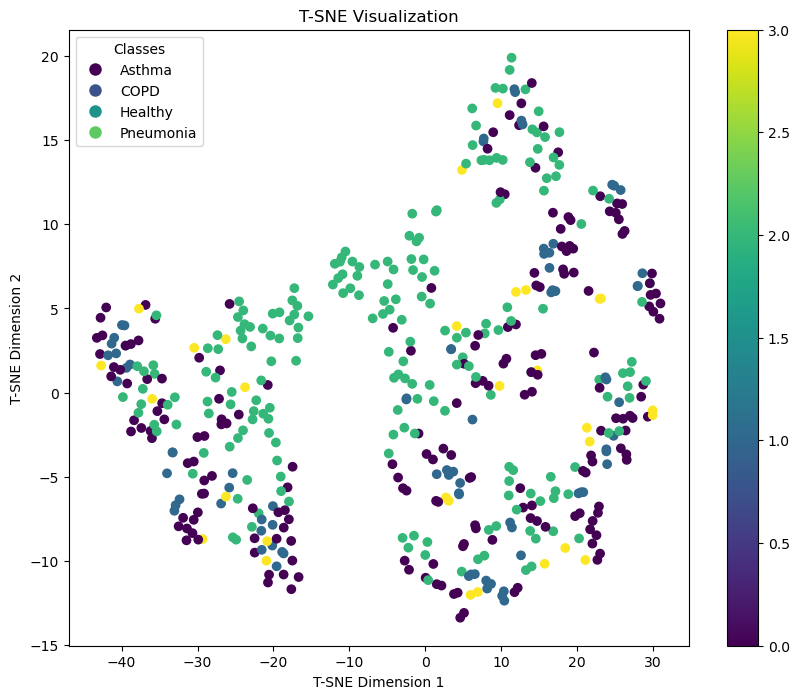

In [29]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne(X, y):
    """
    Plots the T-SNE visualization of the input data.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
    """
    # Convert string labels to numerical values
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    y_num = np.array([label_to_num[label] for label in y])

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot the T-SNE visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_num, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('T-SNE Visualization')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    
    # Add a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  label=label, markerfacecolor=plt.cm.viridis(label_to_num[label] / len(unique_labels)), 
                                  markersize=10) 
                       for label in unique_labels]
    plt.legend(handles=legend_elements, title='Classes')
    
    plt.show()

# Now you can call the function
plot_tsne(x_mfccs, y_mfccs)

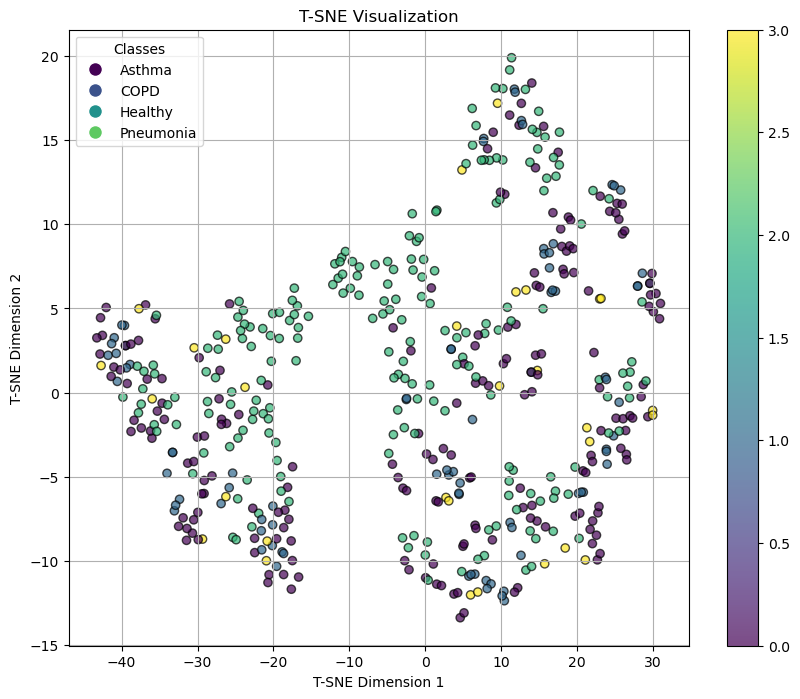

In [39]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne(X, y):
    """
    Plots the T-SNE visualization of the input data with grid.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
    """
    # Convert string labels to numerical values
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    y_num = np.array([label_to_num[label] for label in y])

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot the T-SNE visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_num, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar(scatter)
    plt.title('T-SNE Visualization')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    
    # Add grid
    plt.grid(True)

    # Add a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  label=label, markerfacecolor=plt.cm.viridis(label_to_num[label] / len(unique_labels)), 
                                  markersize=10) 
                       for label in unique_labels]
    plt.legend(handles=legend_elements, title='Classes')
    
    plt.show()

# Example usage (assuming x_mfccs and y_mfccs are defined)
plot_tsne(x_mfccs, y_mfccs)


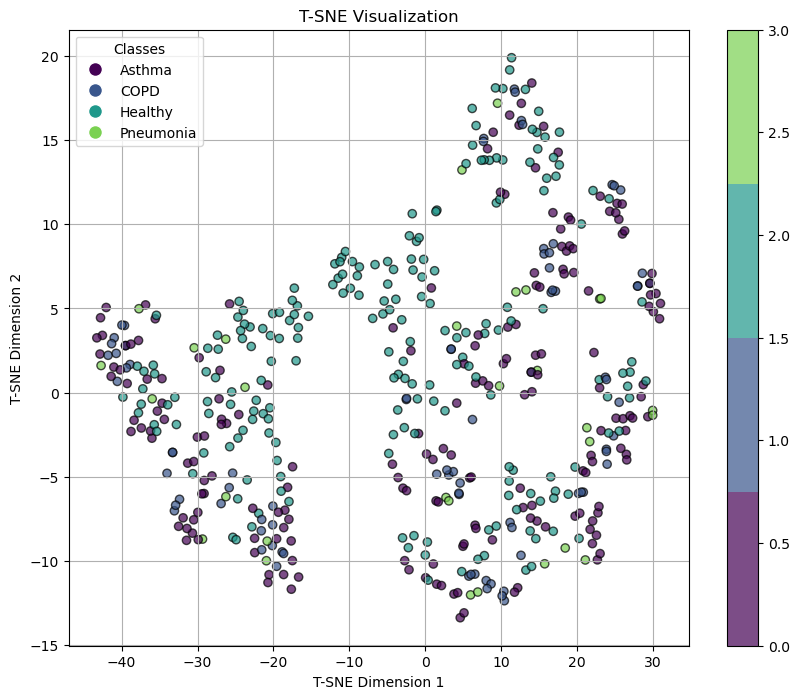

In [41]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from matplotlib.colors import ListedColormap

def plot_tsne(X, y):
    """
    Plots the T-SNE visualization of the input data with grid and only 4 colors.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
    """
    # Convert string labels to numerical values
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    y_num = np.array([label_to_num[label] for label in y])

    # Ensure there are no more than 4 unique labels
    num_colors = min(len(unique_labels), 4)
    colors = plt.cm.viridis(np.linspace(0, 0.8, num_colors))  # Exclude yellow by limiting range

    # Create a colormap with the selected colors
    custom_cmap = ListedColormap(colors)
    
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot the T-SNE visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_num, cmap=custom_cmap, edgecolor='k', alpha=0.7)
    plt.colorbar(scatter)
    plt.title('T-SNE Visualization')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    
    # Add grid
    plt.grid(True)

    # Add a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  label=label, markerfacecolor=colors[i], 
                                  markersize=10) 
                       for i, label in enumerate(unique_labels[:num_colors])]
    plt.legend(handles=legend_elements, title='Classes')
    
    plt.show()

# Example usage (assuming x_mfccs and y_mfccs are defined)
plot_tsne(x_mfccs, y_mfccs)


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne(X, y, classes_to_plot):
    """
    Plots the T-SNE visualization of the input data, displaying only specified classes.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
        classes_to_plot (list): List of class labels to include in the plot.
    """
    # Convert string labels to numerical values
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    
    # Filter the dataset to include only specified classes
    mask = np.isin(y, classes_to_plot)
    X_filtered = X[mask]
    y_filtered = y[mask]
    y_num_filtered = np.array([label_to_num[label] for label in y_filtered])
    
    # Map filtered labels to a smaller set
    unique_labels_filtered = np.unique(y_filtered)
    label_to_num_filtered = {label: i for i, label in enumerate(unique_labels_filtered)}
    y_num_filtered = np.array([label_to_num_filtered[label] for label in y_filtered])
    
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_filtered)
    
    # Plot the T-SNE visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_num_filtered, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, ticks=range(len(unique_labels_filtered)), label='Class')
    plt.title('T-SNE Visualization of Selected Classes')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    
    # Add grid
    plt.grid(True)

    # Add a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  label=label, markerfacecolor=plt.cm.viridis(label_to_num_filtered[label] / len(unique_labels_filtered)), 
                                  markersize=10) 
                       for label in unique_labels_filtered]
    plt.legend(handles=legend_elements, title='Classes')
    
    plt.show()

classes_to_plot = ['class1', 'class2', 'class3', 'class4']
plot_tsne(x_mfccs, y_mfccs, classes_to_plot)


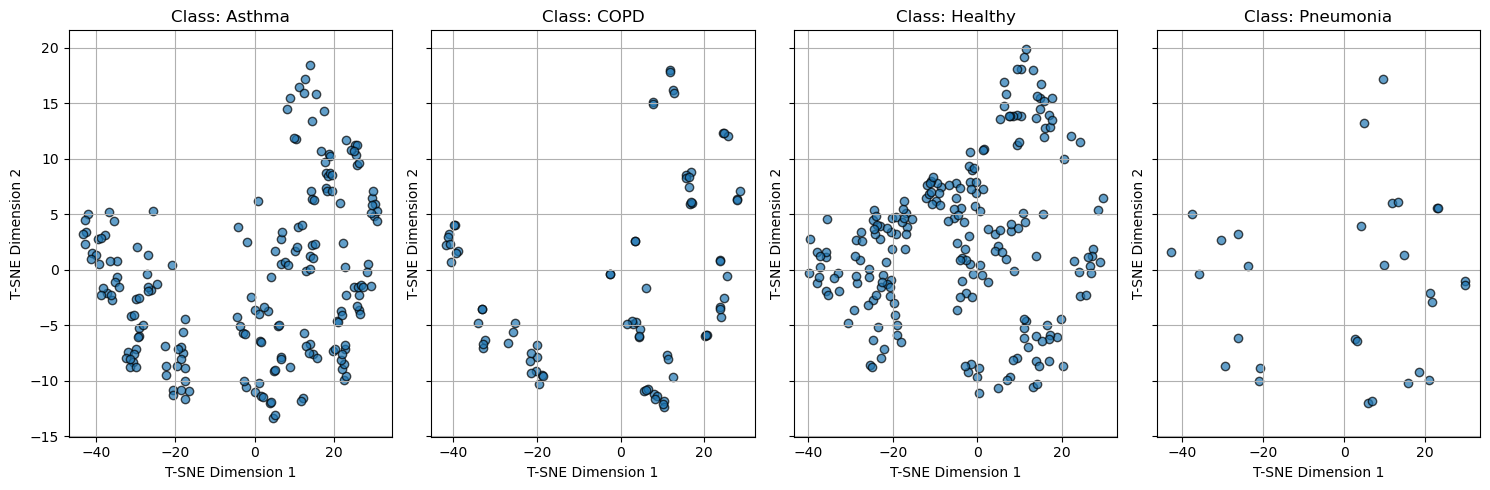

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne_per_class(X, y):
    """
    Plots the T-SNE visualization of the input data with each class in a separate subplot.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
    """
    # Convert string labels to numerical values
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    y_num = np.array([label_to_num[label] for label in y])

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Create a figure with subplots for each class
    num_classes = len(unique_labels)
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5), sharey=True)
    
    # If there's only one subplot, `axes` will be a single Axes object, not an array
    if num_classes == 1:
        axes = [axes]
    
    for i, label in enumerate(unique_labels):
        ax = axes[i]
        class_indices = y_num == label_to_num[label]
        ax.scatter(X_tsne[class_indices, 0], X_tsne[class_indices, 1], edgecolor='k', alpha=0.7)
        ax.set_title(f'Class: {label}')
        ax.set_xlabel(' Dimension 1')
        ax.set_ylabel(' Dimension 2')
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage (assuming x_mfccs and y_mfccs are defined)
plot_tsne_per_class(x_mfccs, y_mfccs)


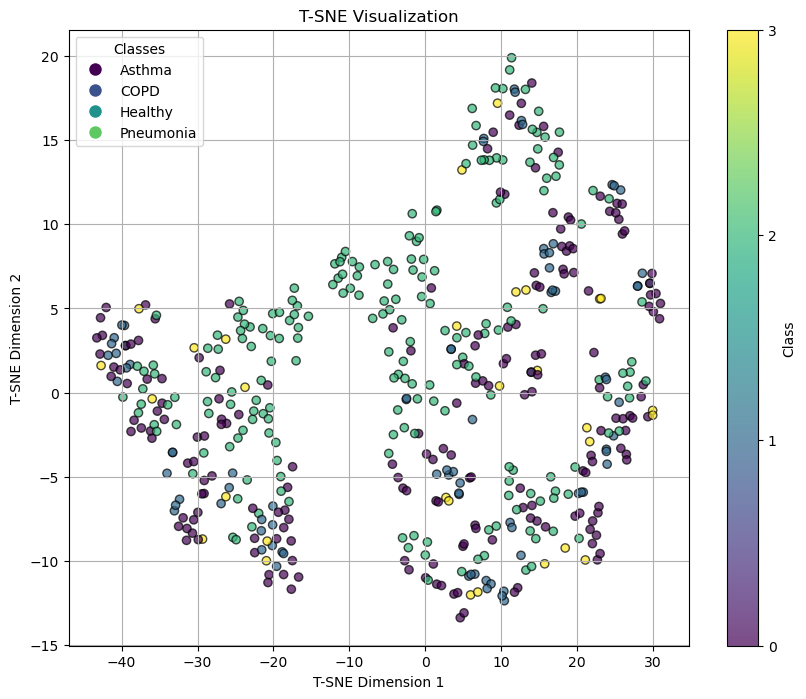

In [37]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne_single_frame(X, y):
    """
    Plots the T-SNE visualization of the input data with each class distinguished by color on a single frame.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
    """
    # Convert string labels to numerical values
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    y_num = np.array([label_to_num[label] for label in y])

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot the T-SNE visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_num, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Class')
    plt.title('T-SNE Visualization')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    
    # Add grid
    plt.grid(True)

    # Add a legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  label=label, markerfacecolor=plt.cm.viridis(label_to_num[label] / len(unique_labels)), 
                                  markersize=10) 
                       for label in unique_labels]
    plt.legend(handles=legend_elements, title='Classes')
    
    plt.show()

# Example usage (assuming x_mfccs and y_mfccs are defined)
plot_tsne_single_frame(x_mfccs, y_mfccs)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

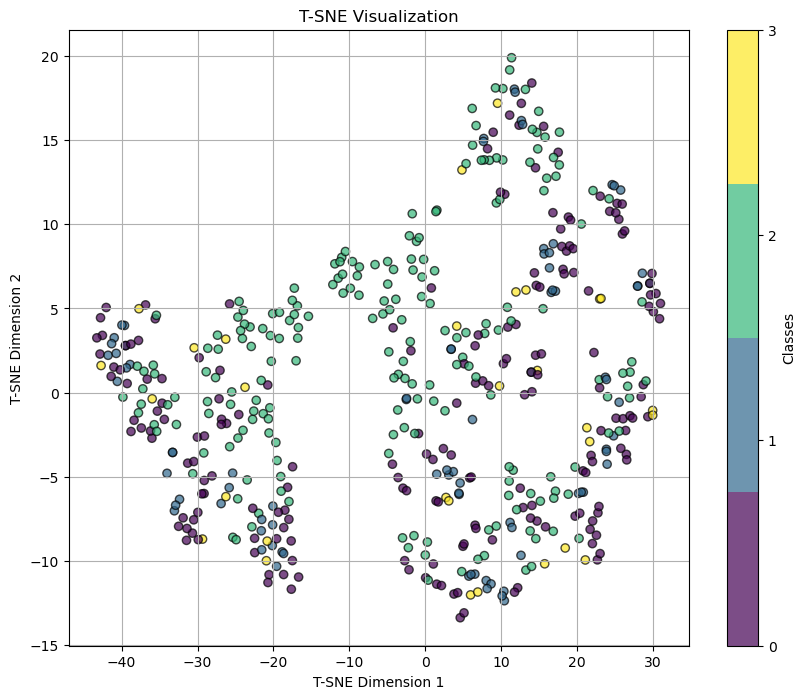

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_tsne(X, y):
    """
    Plots the T-SNE visualization of the input data with grid and labels.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
    """
    # Convert string labels to numerical values
    unique_labels = np.unique(y)
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    y_num = np.array([label_to_num[label] for label in y])
    
    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Create a color map
    cmap = plt.get_cmap('viridis', len(unique_labels))
    
    # Plot the T-SNE visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_num, cmap=cmap, edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Classes')
    plt.title('T-SNE Visualization')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    
    # Add grid
    plt.grid(True)
    
    # Add a legend with specific colors for each label
    handles = []
    for label in unique_labels:
        color = cmap(label_to_num[label] / len(unique_labels))
        handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='')
        handles.append(handle)
    
    plt.legend(handles=handles, labels=unique_labels, title='Classes')
    
    plt.show()

# Example usage (assuming x_mfccs and y_mfccs are defined)
plot_tsne(x_mfccs, y_mfccs)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def augmented_data_count(labels):
    unique, counts = np.unique(labels, return_counts=True)
    data_count = dict(zip(unique, counts))
    
    # Create a violin plot
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.violinplot(x=list(data_count.keys()), y=list(data_count.values()), ax=ax)
    
    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Violin Plot of Disease Counts")
    plt.show()
    
    return data_count

# Call the function with the y_mfccs labels
augmented_data_count(y_mfccs)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(X, y):
    """
    Plots the T-SNE visualization of the input data.
    
    Args:
        X (numpy.ndarray): The input data matrix.
        y (numpy.ndarray): The corresponding labels.
    """
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot the T-SNE visualization
    plt.figure(figsize=(10, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.colorbar()
    plt.title('T-SNE Visualization')
    plt.xlabel('T-SNE Dimension 1')
    plt.ylabel('T-SNE Dimension 2')
    plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Define number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
classes = ["COPD", "Asthma", "Normal", "Pneumonia"]

# Prepare your data
X = np.expand_dims(x_mfccs, axis=1)
Y = np.expand_dims(Y_data, axis=1)

# Define your callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # Add more callbacks if needed
]

# Function to create and compile model
def create_compile_model():
    input_tensor = Input(shape=(1, 60))  # Adjust input shape accordingly
    model_output = InstantiateModel(input_tensor)
    model = Model(inputs=input_tensor, outputs=model_output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = Y[train_index], Y[test_index]

    # Create and compile the model for the current fold
    model_fold = create_compile_model()

    # Train the model
    history = model_fold.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val), callbacks=callbacks)

    # Evaluate the model
    preds = model_fold.predict(x_val)
    classpreds = [np.argmax(t) for t in preds]
    y_val_class = [np.argmax(t) for t in y_val]

    # Compute the confusion matrix
    cm = confusion_matrix(y_val_class, classpreds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(cm, cmap='viridis', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show()

    # Print the classification report
    print(f'Classification Report for Fold {fold}')
    print(classification_report(y_val_class, classpreds, target_names=classes))

    fold += 1

# If needed, you can analyze the histories later
# For example, plot accuracy and loss for each fold
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'Val Fold {i+1}')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Fold {i+1}')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.layers import GRU, Input, LeakyReLU, add, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
   
# Define the function to create the model
def InstantiateModel(in_):
    model_2_1 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(in_)
    model_2 = LeakyReLU()(model_2_1)
    model_2 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_2)
    model_2 = LeakyReLU()(model_2)

    model_3 = GRU(64, return_sequences=True, activation=None, go_backwards=True)(in_)
    model_3 = LeakyReLU()(model_3)
    model_3 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_3)
    model_3 = LeakyReLU()(model_3)

    model_add_1 = add([model_3, model_2])

    model_5 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_add_1)
    model_5 = LeakyReLU()(model_5)
    model_5 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(model_5)
    model_5 = LeakyReLU()(model_5)

    model_6 = GRU(64, return_sequences=True, activation=None, go_backwards=True)(model_add_1)
    model_6 = LeakyReLU()(model_6)
    model_6 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(model_6)
    model_6 = LeakyReLU()(model_6)

    model_add_2 = add([model_5, model_6, model_2_1])

    model_7 = Dense(64, activation=None)(model_add_2)
    model_7 = LeakyReLU()(model_7)
    model_7 = Dropout(0.2)(model_7)
    model_7 = Dense(16, activation=None)(model_7)
    model_7 = LeakyReLU()(model_7)

    model_9 = Dense(32, activation=None)(model_add_2)
    model_9 = LeakyReLU()(model_9)
    model_9 = Dropout(0.2)(model_9)
    model_9 = Dense(16, activation=None)(model_9)
    model_9 = LeakyReLU()(model_9)

    model_add_3 = add([model_7, model_9])

    model_10 = Dense(16, activation=None)(model_add_3)
    model_10 = LeakyReLU()(model_10)
    model_10 = Dropout(0.5)(model_10)
    model_10 = Dense(5, activation="softmax")(model_10)

    return model_10

# Preparing the data
x_data = np.expand_dims(x_mfccs, axis=1)
y_data = np.expand_dims(Y_data, axis=1)
classes = ["COPD", "Asthma", "Normal", "Pneumonia"]

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold = 1

histories = []

# Define your callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

for train_index, val_index in kf.split(x_data):
    x_train, x_val = x_data[train_index], x_data[val_index]
    y_train, y_val = y_data[train_index], y_data[val_index]

    # Reinitialize the model for each fold
    input_tensor = Input(shape=(1, 60))
    model_fold = Model(inputs=input_tensor, outputs=InstantiateModel(input_tensor))
    model_fold.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    

    # Assuming y_data is one-hot encoded, convert it to class labels
    y_data_class_labels = np.argmax(y_data, axis=1)

    # Calculate class weights to handle class imbalance
    class_weights = compute_class_weight('balanced', classes=np.unique(y_data_class_labels), y=y_data_class_labels)
    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    # Learning rate scheduler
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    # Modify the fit method to include class weights and the learning rate scheduler
    history = model_fold.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    epochs=1000, 
    validation_data=(x_val, y_val), 
    callbacks=[callbacks, lr_scheduler],
    class_weight=class_weights)

    # Train the model
    #history = model_fold.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val), callbacks=callbacks)
    histories.append(history)

    # Make predictions on the validation data
    preds = model_fold.predict(x_val)
    classpreds = [np.argmax(t) for t in preds]
    y_val_class = [np.argmax(t) for t in y_val]

    # Compute the confusion matrix
    cm = confusion_matrix(y_val_class, classpreds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(cm, cmap='viridis', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

    # Print the classification report
    print(f'Classification Report for Fold {fold}')
    print(classification_report(y_val_class, classpreds, target_names=classes))

    fold += 1

# If needed, you can analyze the histories later
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'Val Fold {i+1}')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Fold {i+1}')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.layers import GRU, Input, LeakyReLU, add, Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight

# Define the function to create the model
def InstantiateModel(in_):
    model_2_1 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(in_)
    model_2 = LeakyReLU()(model_2_1)
    model_2 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_2)
    model_2 = LeakyReLU()(model_2)

    model_3 = GRU(64, return_sequences=True, activation=None, go_backwards=True)(in_)
    model_3 = LeakyReLU()(model_3)
    model_3 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_3)
    model_3 = LeakyReLU()(model_3)

    model_add_1 = add([model_3, model_2])

    model_5 = GRU(128, return_sequences=True, activation=None, go_backwards=True)(model_add_1)
    model_5 = LeakyReLU()(model_5)
    model_5 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(model_5)
    model_5 = LeakyReLU()(model_5)

    model_6 = GRU(64, return_sequences=True, activation=None, go_backwards=True)(model_add_1)
    model_6 = LeakyReLU()(model_6)
    model_6 = GRU(32, return_sequences=True, activation=None, go_backwards=True)(model_6)
    model_6 = LeakyReLU()(model_6)

    model_add_2 = add([model_5, model_6, model_2_1])

    model_7 = Dense(64, activation=None)(model_add_2)
    model_7 = LeakyReLU()(model_7)
    model_7 = Dropout(0.2)(model_7)
    model_7 = Dense(16, activation=None)(model_7)
    model_7 = LeakyReLU()(model_7)

    model_9 = Dense(32, activation=None)(model_add_2)
    model_9 = LeakyReLU()(model_9)
    model_9 = Dropout(0.2)(model_9)
    model_9 = Dense(16, activation=None)(model_9)
    model_9 = LeakyReLU()(model_9)

    model_add_3 = add([model_7, model_9])

    model_10 = Dense(16, activation=None)(model_add_3)
    model_10 = LeakyReLU()(model_10)
    model_10 = Dropout(0.5)(model_10)
    model_10 = Dense(5, activation="softmax")(model_10)

    return model_10

    # ... (keep the model definition as it was)

# Preparing the data
x_data = np.expand_dims(x_mfccs, axis=1)
y_data = np.expand_dims(Y_data, axis=1)
classes = ["COPD", "Asthma", "Normal", "Pneumonia"]

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold = 1
histories = []

# Define your callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

for train_index, val_index in kf.split(x_data):
    x_train, x_val = x_data[train_index], x_data[val_index]
    y_train, y_val = y_data[train_index], y_data[val_index]

    # Reinitialize the model for each fold
    input_tensor = Input(shape=(1, 60))
    model_fold = Model(inputs=input_tensor, outputs=InstantiateModel(input_tensor))
    model_fold.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Assuming y_data is one-hot encoded, convert it to class labels
    y_train_class_labels = np.argmax(y_train, axis=2).flatten()
    #y_data_class_labels = np.argmax(y_train, axis=1).astype(int)
    # Calculate class weights to handle class imbalance
    unique_classes = np.unique(y_data_class_labels)
    class_weights = compute_class_weight('balanced', classes=unique_classes, y=y_data_class_labels)
    class_weight_dict = dict(zip(unique_classes, class_weights))

    # Learning rate scheduler
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    # Modify the fit method to include class weights and the learning rate scheduler
    history = model_fold.fit(
        x_train, 
        y_train, 
        batch_size=32, 
        epochs=1000, 
        validation_data=(x_val, y_val), 
        callbacks=[callbacks, lr_scheduler],
        class_weight=class_weight_dict
    )

    histories.append(history)

    # Make predictions on the validation data
    preds = model_fold.predict(x_val)
    classpreds = [np.argmax(t) for t in preds]
    y_val_class = [np.argmax(t) for t in y_val]

    # Compute the confusion matrix
    cm = confusion_matrix(y_val_class, classpreds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = sns.heatmap(cm, cmap='viridis', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show(ax)

    # Print the classification report
    print(f'Classification Report for Fold {fold}')
    print(classification_report(y_val_class, classpreds, target_names=classes))

    fold += 1

# If needed, you can analyze the histories later
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'Val Fold {i+1}')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Fold {i+1}')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
